# Cliff Walking
### This notebook attempts to solve the Cliff Walking-V0 problem[part of OpenAI's gym environments] using Sarsa & Q-learning
### Description of problem: 
### A 4x12 grid environment, where the agent[starting from bottom left grid][S] attempts to reach the goal[G] in the shortest time possible. All transition rewards=-1 except for stepping onto cliff. If agent steps onto cliff[states 37-46], it transits to initial position with reward=-100. Episode terminates when agent reaches goal state.

# Part 1: Sarsa

#### Import modules

In [15]:
from tqdm import tqdm 
import gym
import numpy as np
import matplotlib.pyplot as plt

#### Create environment 

We start by creating an array for storing q_values[q_values]. This has num_state rows[48] & num_action columns[4] \
We also create an optimal_policy array for storing optimal actions for each state after running all episodes.     
Observe that this array only has 37 states[48-goal state-cliff states] \
Next, we set parameters[epsilon,discount,step_size,episodes] \
Finally, we create 2 empty lists, one for storing the reward of every timestep[total_rewards], the other for storing average rewards for every i%10==0 episode[average_rewards] 

In [22]:
env = gym.make('CliffWalking-v0', new_step_api=True)

In [23]:
q_values = np.zeros((48,4))
optimal_policy = np.zeros(37)
epsilon = 0.1
discount = 0.9
step_size = 0.5
episodes = 100
all_rewards = []

#### Define functions 

We define some useful functions for agent behavior \
1) choose_action(): \
This calculates action probability & selects an action. If action_prob < epsilon, it will take an exploratory action. Else, act greedily \
2) get_optimal_policy(): \
This obtains the optimal action for each state after running through all episodes. It loops through each state in optimal_policy and gets it's optimal action from q_values
3) agent_step(): \
This updates the state-action pair value when next_state is non-terminal \
4) agent_end(): \
This updates the state-action pair value when next_state is terminal. Notice the difference between this & agent_step() 

In [24]:
def choose_action(s):
    action_prob = np.random.uniform(s)
    if action_prob < epsilon:
        action = env.action_space.sample()
    else:
        action = np.random.choice([idx for idx in range(4) if q_values[s][idx] == max(q_values[s])])
    return int(action)    
    
def get_optimal_policy():
    for i in range(len(optimal_policy)):
        optimal_policy[i] = np.random.choice([idx for idx in range(4) if q_values[i][idx] == max(q_values[i])])
        
def agent_step():
    q_values[state][action] += step_size*(reward + discount*q_values[next_state][next_action] - q_values[state][action])
    
def agent_end():
    q_values[state][action] += step_size*(reward - q_values[state][action])


#### Train agent 

Logic is as follows: \
For every episode, \
1) reset environment(env.reset()) \
2) initialise 1st action to None \
3) reset terminate to False \

For each timestep when terminate is False: \
1) choose action if it's 1st timestep \
2) pass action to env.step() to obtain next_state, reward & terminate \
3) if next_state is not terminal state: \
&ensp;    a) choose next_action \
&ensp;    b) run agent_step() to update action value \
&ensp;    c) set state to next_state \
&ensp;    d) set action to next_action \
4) if next_state is terminal:   
&ensp;    a) run agent_end() to update action value \
5) append reward to total_rewards

For every 10th episode, calculate average reward from total_rewards & append to average_rewards

After running through all episodes, run get_optimal_policy()

In [25]:
for episode in tqdm(range(episodes)):
    state = env.reset()
    action = None
    terminate = False
    episode_rewards = 0
    while not terminate:
        if not action:
            action = choose_action(state)
        next_state, reward, terminate, truncated, info = env.step(action)
        episode_rewards += reward
        if not terminate:
            next_action = choose_action(next_state)
            agent_step()
            state = next_state
            action = next_action
        else:
            agent_end()
            all_rewards.append(episode_rewards)

#     if episode%10 == 0:
#         average_rewards.append(sum(total_rewards)/len(total_rewards))
#         print(f"average reward for batch {episode}: {sum(total_rewards)/len(total_rewards)}")
get_optimal_policy()        
       

100%|██████████| 100/100 [00:00<00:00, 840.12it/s]


#### Plot average rewards 

Let's plot average rewards for each episode batch \
Observe that average reward is increasing 

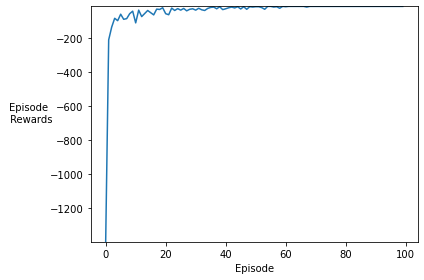

In [27]:
sarsa_rewards = all_rewards
plt.plot(sarsa_rewards)
plt.xlabel("Episode")
plt.ylabel("Episode \n Rewards",rotation=0, labelpad=20)
plt.ylim(round(min(sarsa_rewards)),round(max(sarsa_rewards),4))
plt.tight_layout()
plt.show()

#### Check values 

Let's see if our optimal_policy gives the shortest path from S to G \
Beginning with our starting position[index 36], we observe it's optimal action to be 0[UP] \
Subsequent succeeding states[indices 24-34] give the same optimal action as 1[RIGHT] \
Finally, optimal_policy[35] moves agent downwards to the goal state 

In [28]:
optimal_policy[36], optimal_policy[24:36]

(0.0, array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.]))

Let's check our q_values array \
Observe that rows 37-47 are all zeros \
This is because rows 37-46 correspond to cliff-states while state 47 is the goal state \
So naturally, there are no actions taken from these states & therefore, their action-values are not updated

In [29]:
q_values

array([[ -6.90709264,  -6.85490317,  -6.84464869,  -7.01535841],
       [ -6.76466455,  -6.70626189,  -6.81031318,  -6.80510475],
       [ -6.59438374,  -6.47216647,  -6.49248108,  -6.68709201],
       [ -6.22646397,  -6.17368124,  -6.24397746,  -6.35614334],
       [ -6.02785682,  -5.8977028 ,  -5.90012936,  -5.95608274],
       [ -5.59873331,  -5.55080331,  -5.54661348,  -5.84753066],
       [ -5.3670877 ,  -5.16717089,  -5.32151911,  -5.17189923],
       [ -4.86657917,  -4.76390249,  -4.81494345,  -5.12380712],
       [ -4.31199908,  -4.27462374,  -4.42518385,  -4.40077908],
       [ -4.01263061,  -3.79720978,  -3.786024  ,  -3.73501197],
       [ -3.36579569,  -3.27310239,  -3.24646544,  -3.67190766],
       [ -2.64908109,  -3.18765104,  -2.67559108,  -2.8919193 ],
       [ -6.9177811 ,  -6.96333473,  -7.16758969,  -6.99687484],
       [ -6.76436208,  -6.77275232,  -6.78602497,  -6.72759732],
       [ -6.61550832,  -6.51250186,  -6.55604858,  -6.47704063],
       [ -6.21978543,  -6

#### Rendering 

Time to see our agent in action! \
By looping through each state in optimal_policy, we can get the optimal action in that state \
We then pass that action to env.step() before rendering environment again 

x marks agent's position \
c marks cliff states \
T marks terminal state 

It's interesting to see our agent making it's way to the goal state via the shortest path[hugging the top of the cliff states] using only 100 episodes of training 

In [30]:
env = gym.make('CliffWalking-v0', new_step_api=True, render_mode='human')
state = env.reset()
env.render()
for episode in range(100):
    next_state, reward, done, truncated, info = env.step(int(optimal_policy[state]))
    state = next_state
    env.render()
    
    if done:  
        break
        
env.close() 

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  x  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  x  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  x  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  x  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  x  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o

#### Conclusion 

As observed, Sarsa is able to solve this environment efficiently by considering the sum of reward & next state's action value to be the update target at every timestep. Instead of waiting till the end of each episode before updating, Sarsa makes use of the bootstrap idea of Dynamic Programming & combines it with the sampling idea from monte-carlo to form an efficient algorithm. 

# Part 2: Q-learning

Next, let's try Q-learning \
The only difference lies in the agent_step() \
Instead of using the discounted value of the next state-action pair, we assume the agent takes an action that maximizes this value \
Since the agent only uses it's e-greedy policy for getting to the next state, but assumes a greedy policy for estimating q*, Q-learning is considered to be off-policy

#### Create environment 

In [39]:
env = gym.make('CliffWalking-v0', new_step_api=True)

In [40]:
q_values = np.zeros((48,4))
optimal_policy = np.zeros(37)
epsilon = 0.1
discount = 0.9
step_size = 0.5
episodes = 100
all_rewards = []

#### Define functions 

The only difference is agent_step() where we use max(q_values[next_state]) instead of q_values[next_state][next_action]

In [41]:
def choose_action(s):
    action_prob = np.random.uniform(s)
    if action_prob < epsilon:
        action = env.action_space.sample()
    else:
        action = np.random.choice([idx for idx in range(4) if q_values[s][idx] == max(q_values[s])])
    return int(action)    
    
def get_optimal_policy():
    for i in range(len(optimal_policy)):
        optimal_policy[i] = np.random.choice([idx for idx in range(4) if q_values[i][idx] == max(q_values[i])])
        
def agent_step():
    best_q = np.random.choice([q for q in q_values[next_state] if q == max(q_values[next_state])])
    q_values[state][action] += step_size*(reward + discount*best_q - q_values[state][action])
    
def agent_end():
    q_values[state][action] += step_size*(reward - q_values[state][action])

#### Train agent 

In [42]:
for episode in tqdm(range(episodes)):
    state = env.reset()
    terminate = False
    episode_rewards = 0
    while not terminate:
        action = choose_action(state)
        next_state, reward, terminate, truncated, info = env.step(action)
        episode_rewards += reward
        if not terminate:
            agent_step()
            state = next_state
        else:
            agent_end()
            all_rewards.append(episode_rewards)

#     if episode%10 == 0:
#         average_rewards.append(sum(total_rewards)/len(total_rewards))
#         print(f"average reward for batch {episode}: {sum(total_rewards)/len(total_rewards)}")
get_optimal_policy()        
       

100%|██████████| 100/100 [00:00<00:00, 667.46it/s]


#### Plot average rewards 

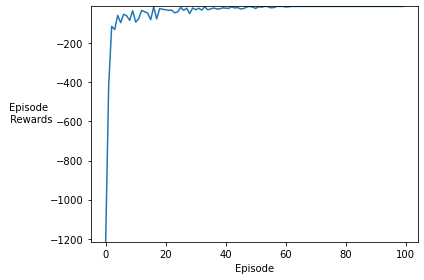

In [44]:
q_rewards = all_rewards
plt.plot(q_rewards)
plt.xlabel("Episode")
plt.ylabel("Episode \n Rewards",rotation=0, labelpad=20)
plt.ylim(round(min(q_rewards)),round(max(q_rewards),4))
plt.tight_layout()
plt.show()

#### Comparing Sarsa & Q-learning 

Seems that Q-learning takes abit lnger to converge

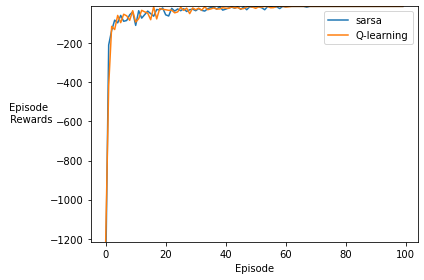

In [48]:
plt.plot(sarsa_rewards)
plt.plot(q_rewards)
plt.xlabel("Episode")
plt.ylabel("Episode \n Rewards",rotation=0, labelpad=20)
plt.ylim(round(min(q_rewards)),round(max(q_rewards),4))
plt.legend(['sarsa','Q-learning'])
plt.tight_layout()
plt.show()

#### Check values 

Observe that Q-learning agent is also able to find the same optimal path to the goal state

In [350]:
optimal_policy[36], optimal_policy[24:36]

(0.0, array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.]))

Again, rows 37-47 consist of zeros

In [351]:
q_values

array([[ -6.89410964,  -6.84226036,  -6.80415752,  -6.93320904],
       [ -6.76466455,  -6.68185913,  -6.74107327,  -6.68718177],
       [ -6.41514078,  -6.45903239,  -6.54480943,  -6.59365568],
       [ -6.22646397,  -6.18968226,  -6.35497838,  -6.16634351],
       [ -6.02785682,  -5.91830658,  -6.00453241,  -5.97659562],
       [ -5.59873331,  -5.58063198,  -5.66047277,  -5.78074395],
       [ -5.3670877 ,  -5.21209497,  -5.28804156,  -5.50162887],
       [ -4.86657917,  -4.7986147 ,  -4.79457506,  -4.88825837],
       [ -4.31199908,  -4.28015226,  -4.45054653,  -4.41699266],
       [ -4.01263061,  -3.82029414,  -3.75623186,  -4.03640884],
       [ -3.36579569,  -3.29730237,  -3.28450687,  -3.59236272],
       [ -3.01662704,  -3.01662704,  -2.6844207 ,  -2.7541193 ],
       [ -6.96394495,  -7.01381867,  -7.09766019,  -7.08010976],
       [ -6.7734418 ,  -6.79870044,  -6.94908663,  -6.91176901],
       [ -6.53909239,  -6.53951088,  -6.59546835,  -6.64970923],
       [ -6.34053028,  -6

#### Rendering 

In [352]:
env = gym.make('CliffWalking-v0', new_step_api=True, render_mode='human')
state = env.reset()
env.render()
for episode in range(100):
    next_state, reward, done, truncated, info = env.step(int(optimal_policy[state]))
    state = next_state
    env.render()
    
    if done:  
        break
        
env.close() 

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  x  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  x  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  x  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  x  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  x  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o

#### Conclusion 

We observe that Q-learning is also able to solve this environment efficiently. By taking max(q_values[next_state]), Q-learning simplifies the code a little and yet is able to achieve similar results to Sarsa. 

Some differences are as followed: \
1) Q-learning directly learns optimal policy while Sarsa learns near-optimal policy. Parameter adjustments may be required for Sarsa to learn an optimal policy \
2) Q-learning follows an e-greedy policy but uses a greedy policy for estimating action values. Sarsa uses the same policy for estimating action values 